In this code i havent used tanh activation function explicitely just implicitely within hidden layers.

Epoch 0, Loss: 2.531869471534129
Epoch 100, Loss: 0.23269798825656252
Epoch 200, Loss: 0.14746062897719753
Epoch 300, Loss: 0.0795166837678504
Epoch 400, Loss: 0.04165047109629289
Epoch 500, Loss: 0.02574849984021829
Epoch 600, Loss: 0.018368695330988366
Epoch 700, Loss: 0.014298474054761333
Epoch 800, Loss: 0.011751623456009008
Epoch 900, Loss: 0.009994690649035626
Epoch 1000, Loss: 0.008686982382785641
Epoch 1100, Loss: 0.0076563584562985955
Epoch 1200, Loss: 0.006809426965325886
Epoch 1300, Loss: 0.006092258409871413
Epoch 1400, Loss: 0.005471958409581123
Epoch 1500, Loss: 0.0049274549387326285
Epoch 1600, Loss: 0.004444619149438028
Epoch 1700, Loss: 0.004013548965122304
Epoch 1800, Loss: 0.0036269932856680728
Epoch 1900, Loss: 0.0032794082189917116


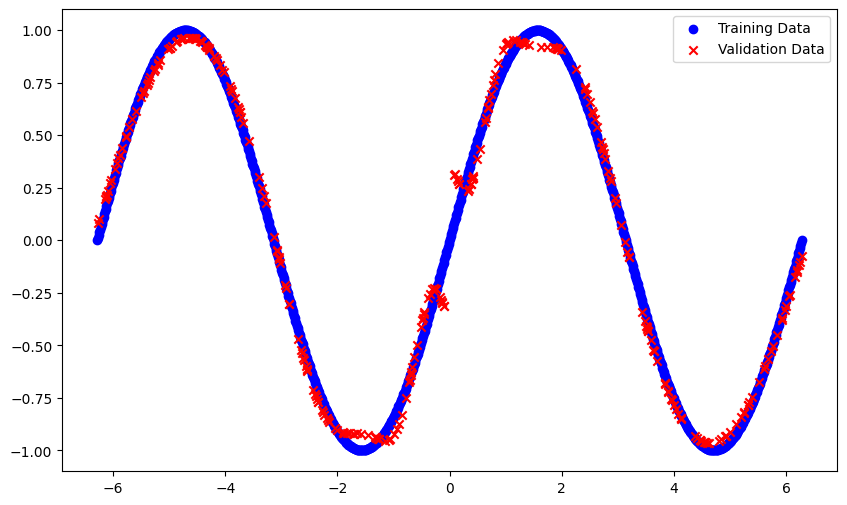

Mean Absolute Percentage Error (MAPE) for validation data: 28.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract (x, y) pairs for training
x_train = np.linspace(-2*np.pi, 2*np.pi, 1000)
y_train = np.sin(x_train)

# Step 2: Extract validation data
x_val = np.random.uniform(-2*np.pi, 2*np.pi, 300)

# Step 3: Define the ANN architecture and train the model
# Here, we'll use a simple ANN with one hidden layer
class NeuralNetwork:
    def __init__(self):
        self.input_size = 1
        self.hidden_size1 = 64
        self.hidden_size2 = 64
        self.output_size = 1
        self.learning_rate = 0.001

        self.W1 = np.random.randn(self.input_size, self.hidden_size1)
        self.b1 = np.zeros((1, self.hidden_size1))
        self.W2 = np.random.randn(self.hidden_size1, self.hidden_size2)
        self.b2 = np.zeros((1, self.hidden_size2))
        self.W3 = np.random.randn(self.hidden_size2, self.output_size)
        self.b3 = np.zeros((1, self.output_size))

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.tanh(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        return self.z3

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            loss = np.mean(np.square(output - y))
            dL_dz3 = 2*(output - y) / X.shape[0]
            dL_dW3 = np.dot(self.a2.T, dL_dz3)
            dL_db3 = np.sum(dL_dz3, axis=0, keepdims=True)
            dL_da2 = np.dot(dL_dz3, self.W3.T)
            dL_dz2 = dL_da2 * self.tanh_derivative(self.z2)
            dL_dW2 = np.dot(self.a1.T, dL_dz2)
            dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)
            dL_da1 = np.dot(dL_dz2, self.W2.T)
            dL_dz1 = dL_da1 * self.tanh_derivative(self.z1)
            dL_dW1 = np.dot(X.T, dL_dz1)
            dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

            self.W1 -= self.learning_rate * dL_dW1
            self.b1 -= self.learning_rate * dL_db1
            self.W2 -= self.learning_rate * dL_dW2
            self.b2 -= self.learning_rate * dL_db2
            self.W3 -= self.learning_rate * dL_dW3
            self.b3 -= self.learning_rate * dL_db3

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

# Step 4: Plot the data and ANN outputs
model = NeuralNetwork()
model.train(x_train.reshape(-1, 1), y_train.reshape(-1, 1), epochs=2000)
y_val = model.forward(x_val.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training Data', color='blue')
plt.scatter(x_val, y_val, label='Validation Data', color='red', marker='x')
plt.legend()
plt.show()

# Step 5: Calculate MAPE for the validation data
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(np.sin(x_val), y_val.flatten())
print(f"Mean Absolute Percentage Error (MAPE) for validation data: {mape:.2f}%")


here i used tanh activation function explicitely and the mape error seems to be significantly reduced
